In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train_data=pd.read_csv("/content/drive/MyDrive/datasets/train_data.txt",sep=":::",names=["title","genre","description"],engine="python")
train_data.head()

,title,genre,description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [ ]:
test_data=pd.read_csv("/content/drive/MyDrive/datasets/test_data.txt",sep=":::",names=["title","descrition"],engine="python")
test_data.head()

,title,descrition
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),Before he was known internationally as a mart...


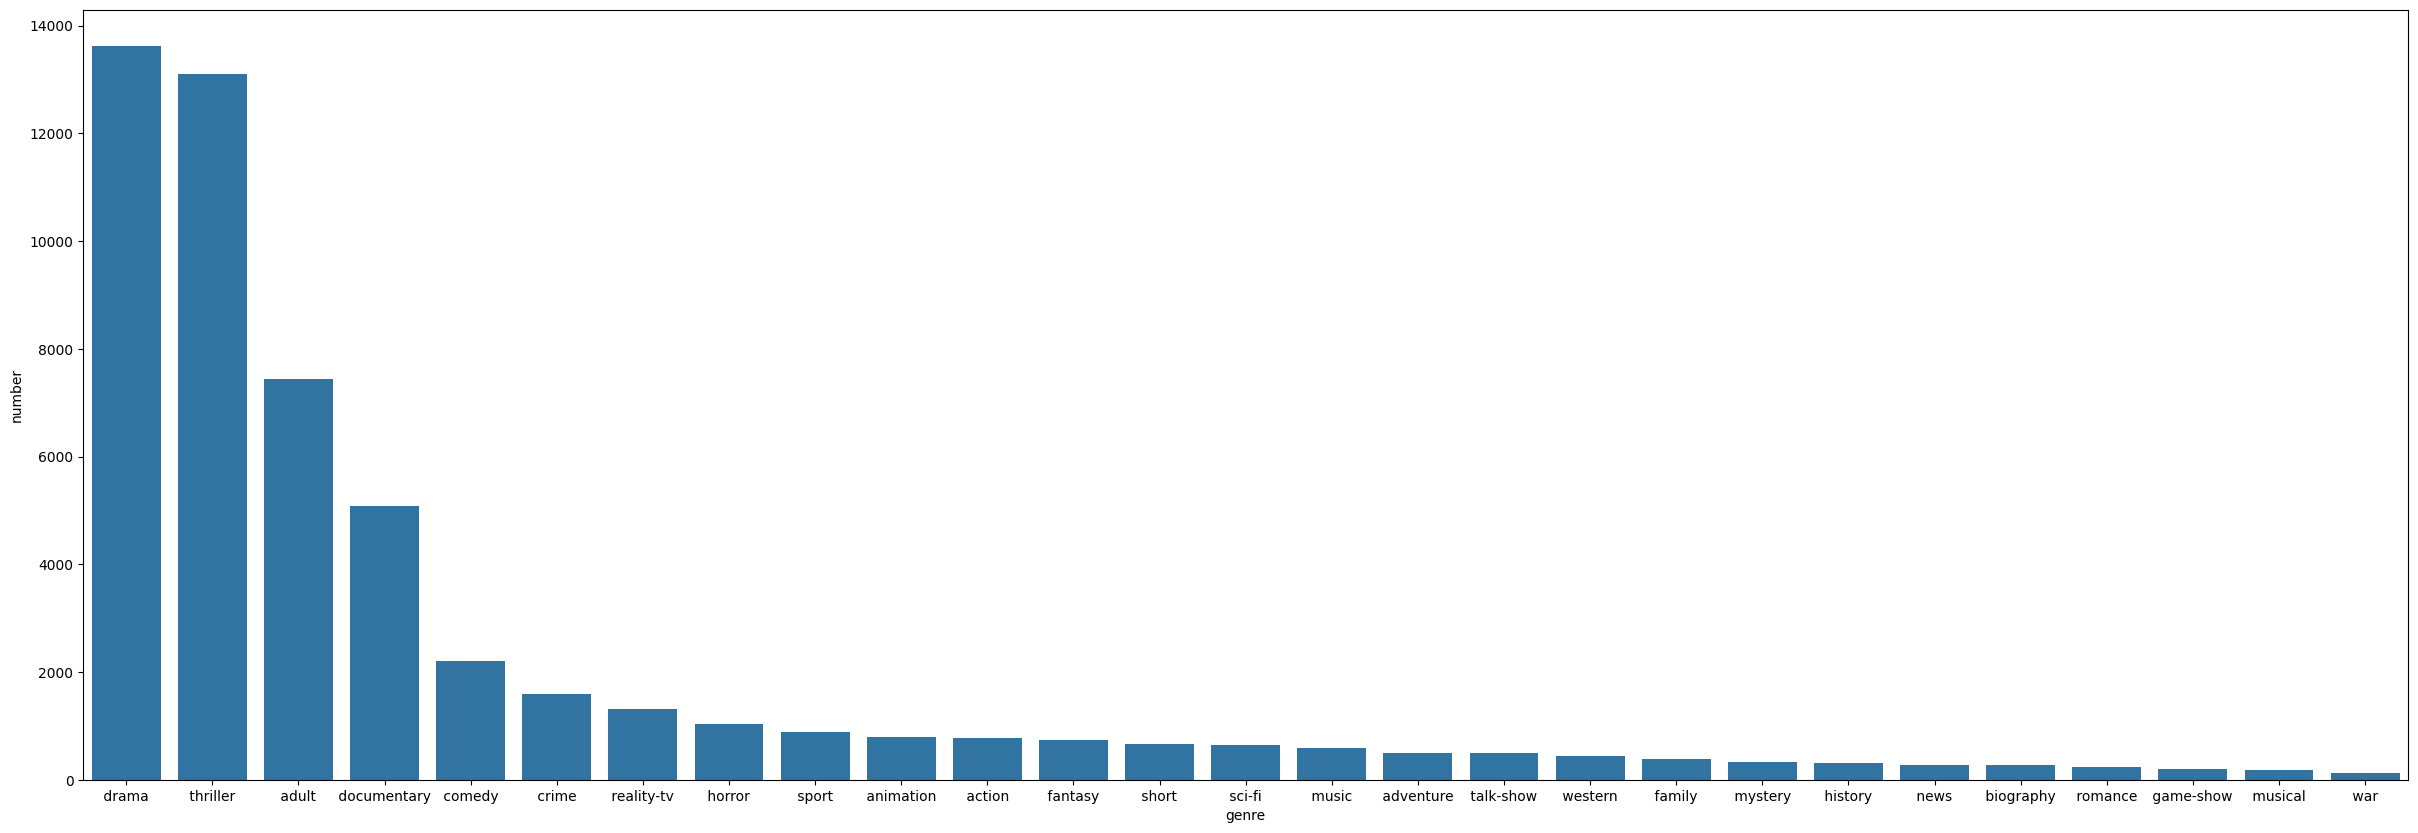

In [ ]:
counts=train_data.genre.value_counts().values
plt.figure(figsize=(30,10))
sns.barplot(x=train_data.genre.unique(), y=counts)
plt.xlabel("genre")
plt.ylabel("number")
plt.show()


In [ ]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        54214 non-null  object
 1   genre        54214 non-null  object
 2   description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [ ]:
train_data.isna().sum()


title          0
genre          0
description    0
dtype: int64

In [ ]:
#checking for duplicates
train_data.describe()

,title,genre,description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [ ]:
train_data.shape


(54214, 3)

In [ ]:
train_data.drop_duplicates()
train_data.shape

(54214, 3)

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import re
st=PorterStemmer()
sw=stopwords.words("english")
def cleaner(text):
  text=text.lower()
  text=re.sub('@\S+','',text)
  text=re.sub("-"," ",text)
  text=re.sub("_"," ",text)
  text=re.sub('[^a-zA-Z\s]','',text)
  text=re.sub("http\S+","",text)
  words=word_tokenize(text)
  words=[word for word in words if word  not in sw and word not in string.punctuation]
  text=" ".join([st.stem(word) for word in words])
  return text

In [ ]:
train_data["root Des"]=train_data["description"].apply(cleaner)


In [ ]:
train_data.head()

,title,genre,description,root Des
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listen convers doctor parent year old oscar le...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestu relationship curre...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bu empti student field trip museum natur histo...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemploy father make end meet edith twin ...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film titl refer un recov bodi ground zero also...


In [ ]:

X=train_data["description"]
Y=train_data['genre']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(stop_words="english")

x_train=vectorizer.fit_transform(x_train)
x_test=vectorizer.transform(x_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(x_train,y_train)

MultinomialNB()

In [ ]:
y_pred=classifier.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,classification_report
print(classification_report(y_test, y_pred))
accuracy_score(y_test,y_pred)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.00      0.00      0.00       376
       adult        0.00      0.00      0.00       172
   adventure        0.00      0.00      0.00       245
   animation        0.00      0.00      0.00       151
   biography        0.00      0.00      0.00        80
      comedy        0.78      0.04      0.08      2225
       crime        0.00      0.00      0.00       142
 documentary        0.52      0.90      0.66      3883
       drama        0.39      0.88      0.54      4140
      family        0.00      0.00      0.00       248
     fantasy        0.00      0.00      0.00       101
   game-show        0.00      0.00      0.00        48
     history        0.00      0.00      0.00        69
      horror        0.00      0.00      0.00       658
       music        0.00      0.00      0.00       226
     musical        0.00      0.00      0.00        83
     mystery        0.00      0.00      0.00        87
        n

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.44561942822010453

In [ ]:
from sklearn.svm import LinearSVC
svm_model = LinearSVC()
svm_model.fit(x_train, y_train)

LinearSVC()

In [ ]:
y_pred=svm_model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,classification_report
print(classification_report(y_test, y_pred))
accuracy_score(y_test,y_pred)


               precision    recall  f1-score   support

      action        0.40      0.31      0.35       376
       adult        0.72      0.42      0.53       172
   adventure        0.59      0.23      0.33       245
   animation        0.38      0.13      0.20       151
   biography        0.00      0.00      0.00        80
      comedy        0.53      0.58      0.55      2225
       crime        0.31      0.06      0.11       142
 documentary        0.68      0.83      0.75      3883
       drama        0.57      0.72      0.63      4140
      family        0.43      0.12      0.18       248
     fantasy        0.25      0.04      0.07       101
   game-show        0.80      0.67      0.73        48
     history        0.25      0.01      0.03        69
      horror        0.63      0.65      0.64       658
       music        0.62      0.50      0.55       226
     musical        0.10      0.01      0.02        83
     mystery        0.22      0.05      0.08        87
        n

0.5829695665539502

In [ ]:
print(train_data["description"][:100])

1       Listening in to a conversation between his do...
2       A brother and sister with a past incestuous r...
3       As the bus empties the students for their fie...
4       To help their unemployed father make ends mee...
5       The film's title refers not only to the un-re...
                             ...                        
96      This feature documentary follows the various ...
97      As indicated by the title, this is an obvious...
98      Del Canyon reluctantly returns to his small h...
99      Verlin is 9 years old and does not talk, nor ...
100     In 1994 the reggae/dance duo Reel 2 Real, fea...
Name: description, Length: 100, dtype: object


In [ ]:
f=train_data["description"][:100].apply(cleaner)
j=vectorizer.transform(f)


In [ ]:
out=train_data["genre"][:100]
out

1             drama 
2          thriller 
3             adult 
4             drama 
5             drama 
           ...      
96      documentary 
97            drama 
98            drama 
99            drama 
100     documentary 
Name: genre, Length: 100, dtype: object

In [ ]:
pred=classifier.predict(j)
pred

array([' documentary ', ' drama ', ' drama ', ' drama ', ' documentary ',
       ' documentary ', ' drama ', ' drama ', ' documentary ', ' drama ',
       ' documentary ', ' drama ', ' documentary ', ' drama ', ' drama ',
       ' drama ', ' drama ', ' documentary ', ' documentary ',
       ' documentary ', ' drama ', ' drama ', ' documentary ', ' drama ',
       ' drama ', ' drama ', ' drama ', ' documentary ', ' drama ',
       ' drama ', ' documentary ', ' documentary ', ' documentary ',
       ' documentary ', ' documentary ', ' drama ', ' drama ', ' drama ',
       ' drama ', ' drama ', ' documentary ', ' drama ', ' comedy ',
       ' drama ', ' drama ', ' drama ', ' documentary ', ' documentary ',
       ' drama ', ' drama ', ' documentary ', ' drama ', ' drama ',
       ' documentary ', ' documentary ', ' drama ', ' documentary ',
       ' drama ', ' drama ', ' documentary ', ' drama ', ' drama ',
       ' documentary ', ' drama ', ' drama ', ' drama ', ' drama ',
       ' drama

In [ ]:
for i in range(1,len(pred)):
  print("genre={} \t\t predgenre={}".format(out[i],pred[i]))

genre= drama  		 predgenre= drama 
genre= thriller  		 predgenre= drama 
genre= adult  		 predgenre= drama 
genre= drama  		 predgenre= documentary 
genre= drama  		 predgenre= documentary 
genre= documentary  		 predgenre= drama 
genre= comedy  		 predgenre= drama 
genre= crime  		 predgenre= documentary 
genre= reality-tv  		 predgenre= drama 
genre= horror  		 predgenre= documentary 
genre= documentary  		 predgenre= drama 
genre= drama  		 predgenre= documentary 
genre= documentary  		 predgenre= drama 
genre= thriller  		 predgenre= drama 
genre= drama  		 predgenre= drama 
genre= drama  		 predgenre= drama 
genre= comedy  		 predgenre= documentary 
genre= documentary  		 predgenre= documentary 
genre= sport  		 predgenre= documentary 
genre= animation  		 predgenre= drama 
genre= drama  		 predgenre= drama 
genre= comedy  		 predgenre= documentary 
genre= comedy  		 predgenre= drama 
genre= drama  		 predgenre= drama 
genre= action  		 predgenre= drama 
genre= fantasy  		 predgen